In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings('ignore')

import os
os.getcwd()

'C:\\Users\\USER\\Documents\\LGhv_practice\\ETL'

In [2]:
#그래프 - 한글 사용 설정
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
    
#그래프 - 음수 사용 설정
plt.rcParams['axes.unicode_minus'] = False

In [3]:
file_path = '../resource/data/data/'

# 수치 데이터

In [7]:
df =pd.read_csv(file_path+'auto-mpg.csv',header = None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
             'acceleration', 'model year', 'origin', 'name']

df.head()

#data의 자료형 확인은 dtypes 속성이나 info()를 호출하면 됨
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## 자료형 변환

In [13]:
#horsepower 컬럼의 자료형을 float으로 변경해서 대입

#df['horsepower'] = df['horsepower'].astype('float') #Error 발생

#Error - > data 확인
df['horsepower'].unique()
df['horsepower'].sort_values() #더 빠른 방법

#?라는 값을 가진 데이터를 어떻게 할 것인지 결정
#?값을 None으로 설정하고 None인 데이터를 제거
df['horsepower'].replace('?', np.nan, inplace = True)
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

In [17]:
#값 변경 + 자료형 변경

#origin이라는 열은 1,2,3이라는 값만 소유하고 있음
#이 값은 실제로는 미국, 유럽, 일본을 의미하는 숫자
#분석을 할 때는 미국, 유럽, 일본으로 보여지는 것이 더 나을 수 있음
#이런 경우는 새로운 컬럼을 추가해서 보여지도록 할 수 도 있고 컬럼의 값을 변경할 수도 있음
#범주형으로 변경해 두는 것이 분석 속도를 높이는데 도움이 됨

df['origin'].replace({1:'미국', 2:'유럽', 3:'일본'}, inplace = True)
df['origin'] = df['origin'].astype('category') #범주형으로 변환
#df.info()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,미국,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,미국,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,미국,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,미국,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,미국,ford torino


## standardization


<Axes: xlabel='이름'>

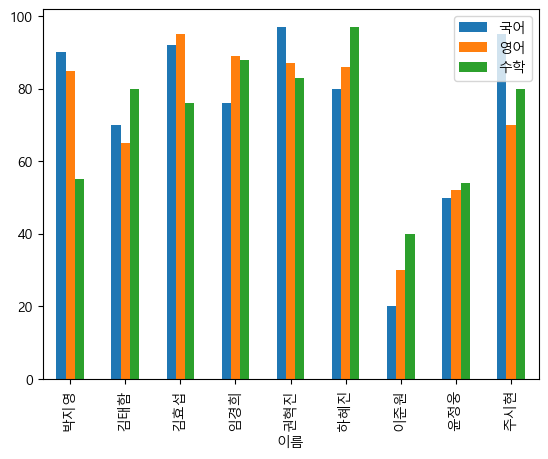

In [12]:
#student.csv 파일 읽어오기
#이름을 인덱스로 사용

df = pd.read_csv(file_path+'student.csv', index_col = '이름', encoding = 'cp949')
#df.head()

#원본 데이터 사용 막대 그래프 생성
df.plot(kind = 'bar')

<Axes: xlabel='이름'>

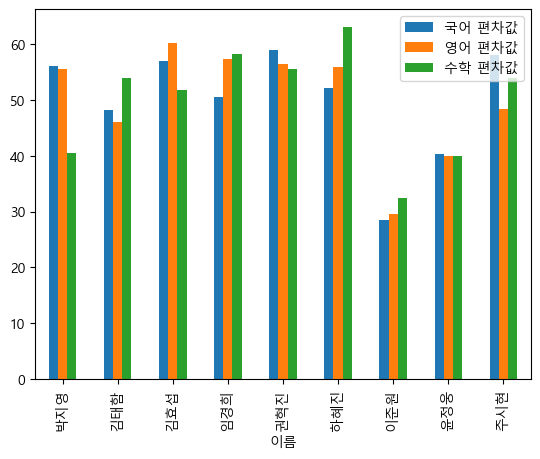

In [14]:
#이 데이터의 경우 단순한 표준화 작업만으로는 성적을 비교하는 것이 어려울 수 있음 -> 단순 표준화 = 표준편차 고려 X
#최대값이나 최대값 - 최소값으로 나눈 데이터로는 비교하기가 어려움
#3 데이터의 크기가 동일함
#이런 경우에는 표준 값이나 편차 값을 구해서 비교하는 것이 좋음

#평균 & 표준 편차 구하기
kormean, korstd = df['국어'].mean(), df['국어'].std()
engmean, engstd = df['영어'].mean(), df['영어'].std()
matmean, matstd = df['수학'].mean(), df['수학'].std()

#표준값 구하기
df['국어 표준값'] = (df['국어'] - kormean) / korstd
df['영어 표준값'] = (df['영어'] - engmean) / engstd
df['수학 표준값'] = (df['수학'] - matmean) / matstd

#편차값 구하기
df['국어 편차값'] = df['국어 표준값'] * 10 + 50
df['영어 편차값'] = df['영어 표준값'] * 10 + 50
df['수학 편차값'] = df['수학 표준값'] * 10 + 50

df[['국어 편차값', '영어 편차값', '수학 편차값']].plot(kind = 'bar')

In [16]:
#데이터 읽어오기
auto_mpg = pd.read_csv(file_path + 'auto-mpg.csv', header = None)
#컬럼 이름 설정
auto_mpg.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
#horsepower 열의 자료형을 실수로 변경
#? -> None으로 치환하고 제거한 후 자료형 변경
auto_mpg.horsepower.replace('?', np.nan, inplace = True)
auto_mpg.dropna(subset = ['horsepower'], axis = 0, inplace = True)
auto_mpg.horsepower = auto_mpg.horsepower.astype('float')

auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [17]:
#horsepower 열의 표준화
#max로 나누면 0부터 시작하지 않을 수 있음
auto_mpg['maxhorserpower'] = auto_mpg['horsepower'] / auto_mpg['horsepower'].max()
auto_mpg['minmaxhorsepower'] = (auto_mpg['horsepower'] - auto_mpg['horsepower'].min()) / (auto_mpg['horsepower'].max() - auto_mpg['horsepower'].min())

auto_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,maxhorserpower,minmaxhorsepower
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.454215,0.317768
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.167353,0.209191
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.200000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.326087,0.157609
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.406522,0.258152
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,0.547826,0.434783
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,1.000000


In [ ]:
✏️

In [21]:
from sklearn import preprocessing

#scaling을 수행할 데이터를 가져오기
x = auto_mpg[['horsepower']].values
#print(type(x))
print('평균:', np.mean(x))
print('표준 편차:', np.std(x))
print('최대 값:', np.max(x))
print('최소 값:', np.min(x))

scaler = preprocessing.StandardScaler()
#scaler.fit(x)
#x_scaled = scaler.transform(x)
x_scaled = scaler.fit_transform(x)

print('평균:', np.mean(x_scaled))
print('표준 편차:', np.std(x_scaled))
print('최대 값:', np.max(x_scaled))
print('최소 값:', np.min(x_scaled))

평균: 104.46938775510205
표준 편차: 38.44203271442593
최대 값: 230.0
최소 값: 46.0
평균: -1.812609019796174e-16
표준 편차: 0.9999999999999998
최대 값: 3.2654519904664348
최소 값: -1.5209754434541274


## 정규화

In [26]:
features = np.array([[1,2],[2,3],[3,8],[4,2],[7,2]])

#정규화 객체 생성
#l1을 norm에 적용하면 맨하튼 거리 - 합치면
#ㅣ2를 적용하면 Euclid 거리 - 각 값을 전체 데이터를 제곱해서 더한 값의 제곱근으로 나누기
normalizer = preprocessing.Normalizer(norm = 'l1')
l2_norm = normalizer.transform(features)
l2_norm

array([[0.33333333, 0.66666667],
       [0.4       , 0.6       ],
       [0.27272727, 0.72727273],
       [0.66666667, 0.33333333],
       [0.77777778, 0.22222222]])

## 다항과 교차항 특성

In [30]:
#다항과 교차항 생성
print(features)
#제곱항까지의 다항을 생성 - 열의 개수가 늘어나게 되는데 회귀 분석을 할 때 시간의 흐름에 따라 변화가 급격하게 일어나는 경우
#또는 데이터가 부족할 때 샘플 데이터를 추가하기 위해서 사용
#제곱을 하거나 곱하기를 하게 되면 데이터의 특성 자체는 크게 변화하지 않기 때문에 사용
polynomialer = preprocessing.PolynomialFeatures(degree = 2, include_bias = False, 
                                               interaction_only = False) #두 elem의 곱만 출력
result = polynomialer.fit_transform(features)
result

[[1 2]
 [2 3]
 [3 8]
 [4 2]
 [7 2]]


array([[ 1.,  2.,  1.,  2.,  4.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 3.,  8.,  9., 24., 64.],
       [ 4.,  2., 16.,  8.,  4.],
       [ 7.,  2., 49., 14.,  4.]])

## 특성 변환

In [38]:
#위의 데이터에 함수 적용
print(features)

#하나의 함수 적용
result1 = preprocessing.FunctionTransformer(lambda x: x+1).transform(features)
#print(result1)

df = pd.DataFrame(features, columns = ['feature1', 'feature2'])
print(df.apply(lambda x: x+1).values)

[[1 2]
 [2 3]
 [3 8]
 [4 2]
 [7 2]]
[[2 3]
 [3 4]
 [4 9]
 [5 3]
 [8 3]]


In [ ]:
from sklearn.compose import ColumnTransformer

#컬럼 별로 다른 함수 적용
def add_one(x):
    return x+1

def sub_one(x):
    return x-1

#feature1에는 add_one적용, feature2에는 sub_one 적용
result2 = ColumnTransformer([('add_one', preprocessing.FunctionTransformer(add_one, validate = True), ['feature1']),
                            ('sub_one', preprocessing.FunctionTransformer(sub_one, validate = True), ['feature2'])]).fit_transform(df)
result2

## 이산화

### pandas - cut

In [43]:
#auto_mpg의 horsepower를 3개의 구간으로 분할
#auto_mpg['horsepower'].describe() #기술통계 값

#경계값 찾기
count, bin_dividers = np.histogram(auto_mpg['horsepower'], bins= 3)
print(count, bin_dividers)

#각 그룹에 할당할 값의 list
bin_names = ['저출력', '보통출력', '고출력']

auto_mpg['hp_bin'] = pd.cut(x = auto_mpg['horsepower'],
                           bins = bin_dividers,
                           labels = bin_names,
                           include_lowest = True)
auto_mpg[['horsepower', 'hp_bin']].head(20)

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]


,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력


### np - digitize

In [45]:
#numpy에서는 group의 명칭을 설정하지 않고 0,1,2처럼 인덱스로 구분함
result = np.digitize(auto_mpg['horsepower'],
                    bins = [107.33333333, 168.66666667, 230.0],
                    right = True)
result

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### sklearn - binning

In [48]:
age = np.array([[13],[30],[67],[20],[33],[27],[19]])
#2개의 그룹으로 분할
binarizer = preprocessing.Binarizer(threshold = 30.0)
result = binarizer.transform(age)
print(result)

#여러 개의 그룹으로 분할
#4개의 그룹으로 일련 번호 형태로 일정한 비율로 분할 - quantile
#strategy에 uniform을 설정하면 간격을 일정하게 분할
#encode가 ordinal이면 일련번호로 그룹이 생성
#onehot을 설정하면 onehot encoding을 한 후 희소 행렬로 
#onehot-dense를 설정하면 onehot encoding을 한 후 밀집 행렬로 
kb = preprocessing.KBinsDiscretizer(4, encode = 'ordinal', strategy = 'uniform')
result = kb.fit_transform(age)
result


[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]


array([[0.],
       [1.],
       [3.],
       [0.],
       [1.],
       [1.],
       [0.]])

### 군집 분석

In [51]:
from sklearn.cluster import KMeans

sample = np.array([[13,30],[30,40],[67,44],[26,24],[22,11],[98,28]])
df = pd.DataFrame(sample, columns = ['feature_1', 'feature_2'])
print(df)

#3개의 군집으로 분할하는 객체 생성
cluster = KMeans(3, random_state = 42)
#sample data를 이용해서 훈련
cluster.fit(sample)
#sample 데이터를 가지고 예측
df['group'] = cluster.predict(sample)

df

   feature_1  feature_2
0         13         30
1         30         40
2         67         44
3         26         24
4         22         11
5         98         28


,feature_1,feature_2,group
0,13,30,0
1,30,40,0
2,67,44,2
3,26,24,0
4,22,11,0
5,98,28,1


## 이상치 탐지

### z- score

In [57]:
#z-score 구하는 함수
def outliers_z_score(ys):
    #표준 편차 임계 값
    threshold = 3.5
    
    #평균 대신에 중앙값 사용
    med_y = np.median(ys) #mean
    print('평균:', med_y)
    stdev_y = np.median([np.abs(y - med_y) for y in ys]) #std
    print('표준 편차:',stdev_y)
    z_scores = [0.6745 * (y - med_y) / stdev_y for y in ys]
    print('z_scores:',z_scores)
    return np.where(np.abs(z_scores) > threshold)

features = np.array([[10,10,7,6,3],[20000,3,23,12,11]])
outliers_z_score(features)

평균: 10.0
표준 편차: 3.5
z_scores: [array([ 0.        ,  0.        , -0.57814286, -0.77085714, -1.349     ]), array([ 3.85235857e+03, -1.34900000e+00,  2.50528571e+00,  3.85428571e-01,
        1.92714286e-01])]


(array([1], dtype=int64), array([0], dtype=int64))

### IQR

In [58]:
def outliers_iqr(ys):
    #Q1, Q3 구하기
    q1, q3 = np.percentile(ys, [25,75])
    iqr = q3 - q1
    #일반적인 데이터의 하한과 상한
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

features = np.array([[10,10,7,6,3], [2000,3,23,12,11]])
outliers_iqr(features)

(array([1, 1], dtype=int64), array([0, 2], dtype=int64))

### 일정한 비율

In [63]:
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

#10행 2열의 데이터를 중앙점을 1.0으로 해서 랜덤하게 생성
features, _ = make_blobs(n_samples = 10, n_features = 2, centers = 1, random_state = 42)
print(features)

#첫 번째 행의 데이터를 이상치로 수정
features[0,0] = 10000
features[0,1] = 10000

#이상치 감지 객체를 생성 - 이상치 비율을 설정
outlier_detector = EllipticEnvelope(contamination = 0.1)
outlier_detector.fit(features)

#이상치로 판정되면 -1을 return 하고 그렇지 않으면 1을 return
outlier_detector.predict(features)

[[-2.743351    8.78014917]
 [-3.4172217   7.60198243]
 [-3.52202874  9.32853346]
 [-2.26723535  7.10100588]
 [-2.97261532  8.54855637]
 [-1.04354885  8.78850983]
 [-1.86150908 10.53731598]
 [-2.97867201  9.55684617]
 [-4.23411546  8.4519986 ]
 [-0.92998481  9.78172086]]


array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## 이상치 처리

In [66]:
houses = pd.DataFrame()
houses['Price'] = [500000, 390000, 290000, 5000000]
houses['Rooms'] = [2,3,5,116]
houses['Feet'] = [1500,2000,1300,20000]

#Rooms 값이 20보다 크면 이상치로 간주하고 특성 추가
houses['Outlier'] = np.where(houses['Rooms']> 20, 1, 0)
houses

#Outlier의 영향을 최소화 - 특성 변환(로그 변환)
houses['Log_Feet'] = [np.log(x) for x in houses['Feet']]
houses

#Outlier의 영향 최소화 - 특성 변환(Scaling)
imsi = pd.DataFrame(houses['Rooms'])
scaler = preprocessing.RobustScaler()
scaler.fit(imsi)
houses['Scale_Rooms'] = scaler.transform(imsi)
#houses['Scale_Rooms'] = scaler.fit_transform(imsi)
houses

,Price,Rooms,Feet,Outlier,Log_Feet,Scale_Rooms
0,500000,2,1500,0,7.313220,-0.066667
1,390000,3,2000,0,7.600902,-0.033333
2,290000,5,1300,0,7.170120,0.033333
3,5000000,116,20000,1,9.903488,3.733333


## 결측치

### 결측치 확인

In [71]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
#titanic.info()

#None의 개수도 출력
titanic['age'].value_counts(dropna = False)
titanic['age'].isnull().sum(axis = 0)

177

### 결측치 삭제

In [76]:
#각 컬럼의 None 개수 파악
titanic.isnull().sum(axis = 0)

#결측치의 개수 가 200개 이상인 컬럼 제거
#titanic_thresh = titanic.dropna(axis = 1, thresh = 200)
#titanic_thresh.columns
result = titanic[['survived','pclass','sex','age','sibsp']] #사용할 컬럼만 선택

#결측치 인 행만 제거 - age 행이 결측치인 행을 제거 
result_age = result.dropna(subset = ['age'], how = 'any',axis = 0)
result_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     714 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 33.5+ KB


### 결측치 대체

#### 이전 값, 대표값

In [83]:
#None을 포함하고 있는 값 출력
titanic['embark_town'][825:831]

#1 - 이전 값으로 채우기
#embark_town 컬럼의 특성이 계절성을 갖는다면 이 경우는 앞의 값으로 채우는 것도 나쁘지 않은 방법
result = titanic['embark_town'].fillna(method = 'ffill')
result[825:831]

#2 - 대표값으로 채우기
#결측치가 몇 개 되지 않을 때는 대표값으로 대체
#대표값으로 사용될 수 있는 데이터는 평균, 중간값, 최빈값 등
#대표값으로 변환하는 경우 많은 양의 데이터를 변경하면 분석할 때 결과가 왜곡될 수 있음
mode = titanic['embark_town'].value_counts()
#가장 많이 출현한 데이터
#mode.idxmax()
result = titanic['embark_town'].fillna(mode.idxmax())
result[825:831]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
830      Cherbourg
Name: embark_town, dtype: object

#### sklearn - SimpleImputer

In [84]:
#sklearn - SimpleImputer 이용
#객체를 만들 때 strategy 옵션에 mean, median, most_frequent, constant를 설정
#constant를 설정하면 fill_value 옵션에 채울 값을 추가해줘야 함
from sklearn.impute import SimpleImputer

features = np.array([[100],[200],[300],[400],[500],[np.nan]])
simple_imputer = SimpleImputer(strategy = 'median')
simple_imputer.fit_transform(features)

array([[100.],
       [200.],
       [300.],
       [400.],
       [500.],
       [300.]])

#### 데이터 간 상관 관계 파악

In [85]:
!pip install fancyimpute

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 892.6/892.6 kB 9.4 MB/s eta 0:00:00
     --------------------------------------- 12.8/12.8 MB 15.9 MB/s eta 0:00:00
     ---------------------------------------- 154.7/154.7 kB ? eta 0:00:00
     ---------------------------------------- 8.2/8.2 MB 14.6 MB/s eta 0:00:00
     ---------------------------------------- 72.0/72.0 kB ? eta 0:00:00
     ------------------------------------- 292.9/292.9 kB 18.8 MB/s eta 0:00:00
     ---------------------------------------- 85.1/85.1 kB 5.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29907 sha256=e4fcb4aea9f38a97d18019d8367b206ea9aba85545789cac99ecb46e623bd732
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\d4\dc\1d\df95900d5962

In [86]:
from fancyimpute import KNN

features = np.array([[100,200],[200,400],[300,600],[400,800],[200,np.nan]])
KNN(k = 5, verbose = 0).fit_transform(features)

array([[100.       , 200.       ],
       [200.       , 400.       ],
       [300.       , 600.       ],
       [400.       , 800.       ],
       [200.       , 400.0000001]])

# 범주형 데이터

## one hot encoding

In [4]:
#auto_mpg data를 가져와서 horsepower의 이상치를 제거하고 숫자 타입으로 변환 
#데이터 읽어오기
auto_mpg = pd.read_csv(file_path + 'auto-mpg.csv', header = None)
#컬럼 이름 설정
auto_mpg.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
#horsepower 열의 자료형을 실수로 변경
#? -> None으로 치환하고 제거한 후 자료형 변경
auto_mpg.horsepower.replace('?', np.nan, inplace = True)
auto_mpg.dropna(subset = ['horsepower'], axis = 0, inplace = True)
auto_mpg.horsepower = auto_mpg.horsepower.astype('float')

auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
#horsepower 의 onehot encoding
#horsepower 특성을 범주형으로 추가 -> 3개의 영역으로 구분
count, bin_dividers = np.histogram(auto_mpg['horsepower'], bins =3)

#범주형의 형태로 생성
auto_mpg['hp_bin'] = pd.cut(x = auto_mpg['horsepower'],
                            bins = bin_dividers,
                            labels = ['저출력', '보통출력', '고출력'],
                            include_lowest = True)

auto_mpg[['horsepower','hp_bin']].head()

#one hot encoding - 값이 3 종류 이므로 3개의 특성이 만들어지고 값은 하나만 1
horsepower_dummies = pd.get_dummies(auto_mpg['hp_bin'])
horsepower_dummies

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
393,1,0,0
394,1,0,0
395,1,0,0
396,1,0,0


## sklearn.preprocessing

In [10]:
#하나의 특성을 one hot encoding 해주는 class
from sklearn.preprocessing import LabelBinarizer

one_hot = LabelBinarizer()
one_hot.fit_transform(auto_mpg['hp_bin'])

#이름 확인
one_hot.classes_

array(['고출력', '보통출력', '저출력'], dtype='<U4')

In [12]:
#2개 이상의 특성을 가지고 one hot encoding
#2개 이상의 1이 등장할 수 있음
from sklearn.preprocessing import MultiLabelBinarizer

multi_features = [('Java', 'C++'),('C++','Python'),('Java','C#'),
                  ('Java','Kotlin'),('Python','Go'),('Python','R')]

one_hot_multiclass = MultiLabelBinarizer()

one_hot_multiclass.fit_transform(multi_features), one_hot_multiclass.classes_

(array([[0, 1, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1]]),
 array(['C#', 'C++', 'Go', 'Java', 'Kotlin', 'Python', 'R'], dtype=object))

## data 순서 - 의미 O

In [13]:
#순서가 의미를 갖는 경우 - replace 함수 이용
df = pd.DataFrame({'Score':['저조','보통','보통','저조','우수','매우우수']})

scale_mapper = {'저조':1, '보통':2, '우수':3, '매우우수': 4}
df['encoder'] = df['Score'].replace(scale_mapper)
df

,Score,encoder
0,저조,1
1,보통,2
2,보통,2
3,저조,1
4,우수,3
5,매우우수,4


In [15]:
#Ordinal Encoder 사용
from sklearn.preprocessing import OrdinalEncoder

features = np.array([['Low', 10],['Normal', 20], ['High', 15]])
ordinal_encoder = OrdinalEncoder()

ordinal_encoder.fit_transform(features), ordinal_encoder.categories_

(array([[1., 0.],
        [2., 2.],
        [0., 1.]]),
 [array(['High', 'Low', 'Normal'], dtype='<U11'),
  array(['10', '15', '20'], dtype='<U11')])

## 결측치 값 대체

In [33]:
#분류 모델을 이용한 결측치값 대체
from sklearn.neighbors import KNeighborsClassifier

#훈련 데이터 생성
X = np.array([[0,2.10,1.45],[1,1.18,1.33],[0,1.22,1.27],[1,-0.21,-1.19]])

#예측에 사용할 데이터
X_with_nan = np.array([[np.nan,0.87,0.31],[np.nan,-0.67,-0.22]])

#KNN 학습기 생성
clf = KNeighborsClassifier(3, weights = 'distance')

#1번째 데이터 - label, 나머지 데이터 - feature로 설정해서 훈련
trained_model = clf.fit(X[:,1:],X[:,0]) 

#예측
imputed_values = trained_model.predict(X_with_nan[:,1:])
imputed_values

#예측 데이터와 원본 데이터 합치기
X_with_imputed = np.hstack((imputed_values.reshape(-1,1), X_with_nan[:,1:]))
X_with_imputed

#결측치를 대체한 데이터와 훈련에 사용한 데이터와 합치기
result = np.vstack((X_with_imputed, X))
result

[[ 0.    0.87  0.31]
 [ 1.   -0.67 -0.22]]


array([[ 0.  ,  0.87,  0.31],
       [ 1.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

In [34]:
#가장 많이 나오는 데이터로 대체 
from sklearn.impute import SimpleImputer

X_complete = np.vstack((X_with_nan, X))
print(X_complete)
imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit_transform(X_complete)

[[  nan  0.87  0.31]
 [  nan -0.67 -0.22]
 [ 0.    2.1   1.45]
 [ 1.    1.18  1.33]
 [ 0.    1.22  1.27]
 [ 1.   -0.21 -1.19]]


array([[ 0.  ,  0.87,  0.31],
       [ 0.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

# text data

## 정규 표현식

In [84]:
import re

#매칭 여부 확인
match = re.match('[0-9]','1234')
#패턴에 일치하는 데이터가 있으면 Match 객체를 return 하고 없으면 None return
print(match)

match = re.match('[0-9]', 'abc')
#패턴에 일치하는 데이터가 있으면 Match 객체를 return 하고 없으면 None return
print(match)

<re.Match object; span=(0, 1), match='1'>
None


In [87]:
string = '@안녕하세요 반갑습니다 ^^ 123 의미 없는 숫자.... !!!!'

#숫자 데이터 제거 
p = re.compile('[0-9]+')
result = p.sub('', string)
print(result)

p = re.compile('\W+')
result = p.sub(' ', result)
print(result)

@안녕하세요 반갑습니다 ^^  의미 없는 숫자.... !!!!
 안녕하세요 반갑습니다 의미 없는 숫자 


In [93]:
import unicodedata
import sys

text_data = ['안녕하세요 반갑습니다.','My Job is Programmer','C&C++,C#, Python']

#구두 점 dictionary를 생성
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                           if unicodedata.category(chr(i)).startswith('P'))

result = [string.translate(punctuation) for string in text_data]
result

['안녕하세요 반갑습니다', 'My Job is Programmer', 'CC++C Python']

## text tokenization

In [94]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [96]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

string = 'The science of today is the technology of tomorrow'

print(word_tokenize(string))

string = """품질은 양보다 중요합니다. 한 번의 홈런이 두번의 2루타보다 낫습니다.
            혁신은 현존하는 수천 가지 것들에 아니라고 말하는 것이다.
            시간이 없습니다 누군가를 위해서 단신의 삶을 버리지 마세요."""
sent_tokenize(string)

['The', 'science', 'of', 'today', 'is', 'the', 'technology', 'of', 'tomorrow']


['품질은 양보다 중요합니다.',
 '한 번의 홈런이 두번의 2루타보다 낫습니다.',
 '혁신은 현존하는 수천 가지 것들에 아니라고 말하는 것이다.',
 '시간이 없습니다 누군가를 위해서 단신의 삶을 버리지 마세요.']

## 불용어 처리

In [120]:
from nltk.corpus import stopwords

#불용어 제거 - 한글은 불용어 사전이 없어서 불용어 사전을 직접 작성
word_korean = ['1월', '2월','3월','4월']
kr_stopwords = ['2월','5월']
#i for in word_korean if i inot in stopwords라는 작업을 수행해서 generator 생성
#generator는 iterator로 접근 할 수 있는 객체
result = [i for i in word_korean if i not in kr_stopwords]
print(result)

#영문은 nltk에서 기본적인 불용어 사전을 제공
word_english = ['chief', 'the','an','and','president','kenedy']
result = [w for w in word_english if not w in stopwords.words('english')]
print(result)

#sklearn이 nltk보다 불용어의 개수가 조금 더 많음
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
result = [w for w in word_english if not w in ENGLISH_STOP_WORDS]
result

['1월', '3월', '4월']
['chief', 'president', 'kenedy']


['chief', 'president', 'kenedy']

## 어간 추출

In [121]:
#영문 어간 추출
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

from nltk.tokenize import word_tokenize

In [130]:
string = 'All pythoners have pythoned poorly at least once'

#단어 token화 - 공백을 기준으로 분할해서 list로 생성
words = word_tokenize(string)
print(words)

ps_stemmer = PorterStemmer()
#어간 추출
for w in words:
    print(ps_stemmer.stem(w), end ='\t')
print()

ls_stemmer = LancasterStemmer()
#어간 추출
for w in words:
    print(ls_stemmer.stem(w), end ='\t')
print()

['All', 'pythoners', 'have', 'pythoned', 'poorly', 'at', 'least', 'once']
all	python	have	python	poorli	at	least	onc	
al	python	hav	python	poor	at	least	ont	


## 형태소 분석

In [134]:
import nltk
nltk.download('averaged_perceptron_tagger')

from nltk import pos_tag
from nltk import word_tokenize

tokens = word_tokenize('The little yellow don barked at the Persian cat')
tags_en = pos_tag(tokens)
#단어와 품사를 튜플의 list로 출력
#품사 (NNP - 고유명사, NN - 명사, RB: 부사, VBD: 동사, VBG: 동사, 동명사, 현재분사, JJ:형용사)
print(tags_en)

#명사와 고유 명사만 추출
print([word for word, tag in tags_en if tag in ['NN','NNP']])

[('The', 'DT'), ('little', 'JJ'), ('yellow', 'JJ'), ('don', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('Persian', 'JJ'), ('cat', 'NN')]
['don', 'cat']


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## 한글 형태소 분석

In [137]:
from konlpy.tag import Kkma
from konlpy.tag import Hannanum

In [136]:
text = '''태양계는 지금으로부터 약 46억 년 전 거대한 분자 구름의 일부분이 중력 붕괴를 일으키면서 형성되었다.'''

kkma = Kkma()
#문장 분석
print(kkma.sentences(text))
#단어 분석
print(kkma.nouns(text))
#형태소 분석 - 데이터의 길이에 따라 시간이 오래 걸릴 수 있음
print(kkma.pos(text))

['태양계는 지금으로부터 약 46억 년 전 거대한 분자 구름의 일부분이 중력 붕괴를 일으키면서 형성되었다.']
['태양계', '지금', '46', '46억', '억', '년', '전', '거대', '분자', '구름', '일부분', '중력', '붕괴', '형성']
[('태양계', 'NNG'), ('는', 'JX'), ('지금', 'NNG'), ('으로', 'JKM'), ('부터', 'JX'), ('약', 'MDN'), ('46', 'NR'), ('억', 'NR'), ('년', 'NNB'), ('전', 'NNG'), ('거대', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('분자', 'NNG'), ('구름', 'NNG'), ('의', 'JKG'), ('일부분', 'NNG'), ('이', 'JKS'), ('중력', 'NNG'), ('붕괴', 'NNG'), ('를', 'JKO'), ('일으키', 'VV'), ('면서', 'ECE'), ('형성', 'NNG'), ('되', 'XSV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [140]:
#다른 형태소 분석기
#성능은 Kkma가 우수하다고 알려져 있는데 메모리 사용량이 많고 속도가 조금 느림

hannanum = Hannanum()
#단어 분석
print(hannanum.nouns(text))
#형태소 분석 - 데이터의 길이에 따라 시간이 오래 걸릴 수 있음
print(hannanum.morphs(text))
print(hannanum.pos(text))

['태양계', '지금', '약', '46억', '년', '전', '거대', '자', '구름', '일부분', '중력', '붕괴', '형성']
['태양계', '는', '지금', '으로부터', '약', '46억', '년', '전', '거대', '하', 'ㄴ', '불', 'ㄴ', '자', '구름', '의', '일부분', '이', '중력', '붕괴', '를', '일으키', '면서', '형성', '되', '었다', '.']
[('태양계', 'N'), ('는', 'J'), ('지금', 'N'), ('으로부터', 'J'), ('약', 'N'), ('46억', 'N'), ('년', 'N'), ('전', 'N'), ('거대', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('불', 'P'), ('ㄴ', 'E'), ('자', 'N'), ('구름', 'N'), ('의', 'J'), ('일부분', 'N'), ('이', 'J'), ('중력', 'N'), ('붕괴', 'N'), ('를', 'J'), ('일으키', 'P'), ('면서', 'E'), ('형성', 'N'), ('되', 'X'), ('었다', 'E'), ('.', 'S')]


## BoW

In [145]:
#Bag of Words - 단어의 개수 
from sklearn.feature_extraction.text import CountVectorizer

text_data = np.array([
    'I love Newziland newziland',
    'Sweden is good',
    'I hate Japan',
    'Germany beats both'
])

count = CountVectorizer()
bag_of_words = count.fit_transform(text_data)
#희소 행렬의 형태로 출력
print(bag_of_words)

#특성 이름 확인
print(count.get_feature_names_out())

#밀집 행렬로 변환
bag_of_words.toarray()

  (0, 7)	1
  (0, 8)	2
  (1, 9)	1
  (1, 5)	1
  (1, 3)	1
  (2, 4)	1
  (2, 6)	1
  (3, 2)	1
  (3, 0)	1
  (3, 1)	1
['beats' 'both' 'germany' 'good' 'hate' 'is' 'japan' 'love' 'newziland'
 'sweden']


array([[0, 0, 0, 0, 0, 0, 0, 1, 2, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_data = np.array([
    'I love Newziland newziland',
    'Sweden is good',
    'I hate Japan',
    'Germany beats both',
    'Korea is top of the top'
])

#tf - idf 객체 생성
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(text_data)

#print(featur_matrix)
print(tfidf.vocabulary_)
feature_matrix.toarray()

{'love': 8, 'newziland': 9, 'sweden': 11, 'is': 5, 'good': 3, 'hate': 4, 'japan': 6, 'germany': 2, 'beats': 0, 'both': 1, 'korea': 7, 'top': 13, 'of': 10, 'the': 12}


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.4472136 , 0.89442719,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.61418897, 0.        ,
        0.49552379, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.61418897, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.70710678,
        0.        , 0.70710678, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.57735027, 0.57735027, 0.57735027, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.29167942, 0.        , 0.36152912, 0.        , 0.        ,
        0.36152912, 0.        , 0.36152912, 0.72305823]])

# 시계열 데이터

## 문자열 -> 시계열 변환

In [5]:
#데이터 읽어오기 - stock-data.csv
df = pd.read_csv(file_path+'stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [6]:
#날짜 자료형으로 변경해서 새로운 필드로 저장
df['NewDate'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     20 non-null     object        
 1   Close    20 non-null     int64         
 2   Start    20 non-null     int64         
 3   High     20 non-null     int64         
 4   Low      20 non-null     int64         
 5   Volume   20 non-null     int64         
 6   NewDate  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [7]:
#새로 만들어진 날짜 컬럼을 인덱스로 지정하고 기존의 날짜 컬럼 삭제
df.set_index('NewDate', inplace = True)
df.drop('Date', axis = 1, inplace = True)
df.head()

,Close,Start,High,Low,Volume
NewDate,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [20]:
#첫 번째 데이터 - 날짜로 변경 가능한 데이터
#두 번째 데이터 - 날짜로 변경 불가능한 데이터 
date_strings = np.array([
    '03-04-2005 11:35PM', '04-0902005 09:09 TM'
])

#예외 발생
#[pd.to_datetime(date, format = '%d-%m-%Y %I:%M %p') for date in date_strings]
#예외가 발생하면 문자열 그대로 저장
#list는 2ㅐ의 데이터 자료형이 달라도 문제가 없지만
#array나 DataFrame으로 변환해서 사용하는 경우에는 문제가 발생할 수 있음
#-> 이 방법 권장 X
print([np.array([pd.to_datetime(date, format = '%d-%m-%Y %I:%M %p', errors = 'ignore')
          for date in date_strings])])
print(pd.DataFrame([pd.to_datetime(date, format = '%d-%m-%Y %I:%M %p', errors = 'ignore')
          for date in date_strings]).info()) #자료형 통일

#변환이 안되는 경우는 NaT로 설정: 결측치로 처리
'''
print(pd.DataFrame([pd.to_datetime(date, format = '%d-%m-%Y %I:%M %p', errors = 'coerce')
          for date in date_strings]).info()) 
'''

#예외 발생 시키기
'''
print(pd.DataFrame([pd.to_datetime(date, format = '%d-%m-%Y %I:%M %p', errors = 'raise')
          for date in date_strings]).info()) #자료형 통일
'''

[array(['03-04-2005 11:35PM', '04-0902005 09:09 TM'], dtype='<U19')]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes
None


"\nprint(pd.DataFrame([pd.to_datetime(date, format = '%d-%m-%Y %I:%M %p', errors = 'raise')\n          for date in date_strings]).info()) #자료형 통일\n"

In [22]:
date_strings = np.array([
    '2023-01-01','2023-02-02', '2023-02-03', '2023-04-05'
])

pddates = pd.to_datetime(date_strings)
#월 단위로 변경
pr_months = pddates.to_period(freq = 'M')
pr_months

PeriodIndex(['2023-01', '2023-02', '2023-02', '2023-04'], dtype='period[M]')

## 주기를 갖는 날짜 생성

In [25]:
#2023년 1월1일 부터 월 단위로 12개를 생성
ts_ms = pd.date_range(start = '2023-01-01', periods = 12, freq = 'MS', tz= 'Asia/Seoul')
ts_ms

DatetimeIndex(['2023-01-01 00:00:00+09:00', '2023-02-01 00:00:00+09:00',
               '2023-03-01 00:00:00+09:00', '2023-04-01 00:00:00+09:00',
               '2023-05-01 00:00:00+09:00', '2023-06-01 00:00:00+09:00',
               '2023-07-01 00:00:00+09:00', '2023-08-01 00:00:00+09:00',
               '2023-09-01 00:00:00+09:00', '2023-10-01 00:00:00+09:00',
               '2023-11-01 00:00:00+09:00', '2023-12-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

## datetime64 - 인덱스 설정 사용

In [28]:
#데이터 읽어와서 문자열 -> 날짜 변경
df =pd.read_csv(file_path+'stock-data.csv')
df['new_Date'] = pd.to_datetime(df['Date'])
df.set_index('new_Date', inplace = True)
df.head()

#날짜 인덱스라서 날짜의 일부분을 가지고 인덱싱 가능
df_y = df['2018']
df_y.head()

df_y = df['2018-07']
df_y.head()

,Date,Close,Start,High,Low,Volume
new_Date,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977


In [31]:
df_y = df.loc['2018-06-25':'2018-06-30']
df_y.head()

df_y = df.loc['2018-06-25':'2018-06-30', 'Start':'Low']
df_y.head()

,Start,High,Low
new_Date,,,
2018-06-29,10550,10900,9990
2018-06-28,10900,10950,10150
2018-06-27,10800,11050,10500
2018-06-26,10900,11000,10700
2018-06-25,11400,11450,11000


## 결측치 처리

In [36]:
time_index = pd.date_range('01-01-2023', periods = 5, freq = 'M')
dataframe = pd.DataFrame(index = time_index)
dataframe['Sales'] = [0.1,2.0,np.nan, np.nan, 5.0]
dataframe

#앞의 데이터로 채우기
#dataframe.ffill()

#선형 보간 - 1차
#dataframe.interpolate()

#비선형 보간 - 다항 
#dataframe.interpolate(method = 'quadratic')

,Sales
2023-01-31,0.1
2023-02-28,2.0
2023-03-31,NaN
2023-04-30,NaN
2023-05-31,5.0


In [39]:
dataframe['Stock_Price'] = [1,2,3,4,5]
#단순 이동 평균
dataframe.rolling(window = 3).mean()
#지수 이동 평균
dataframe.ewm(span = 3).mean()

,Sales,Stock_Price
2023-01-31,0.100000,1.000000
2023-02-28,1.366667,1.666667
2023-03-31,1.366667,2.428571
2023-04-30,1.366667,3.266667
2023-05-31,4.426316,4.161290
